# Analysis of Quantitative Ratings

#### The RE-Pract Survey Research Questions

1. What is the relevance of RE research to practitioners in the industry?
2. What are the most highly rated research ideas?
3. What research problems do practitioners think are most important to be focused on by the RE research community?
4. Do papers with explicit ties to industry have higher practical relevance than other papers?
5. Do practitioners’ perceptions and views differ in dependence on their roles?

#### Our Data Sources

* 435 Paper Summaries with Metadata and Tags

* 154 Respondents with Metadata

* 2164 Paper Ratings

# Setup and Definitions

In [1]:
%run setup.py
%matplotlib inline

## Scores to be used for evaluation

In [2]:
def e_score(x):
    eScore = np.count_nonzero(x == 'Essential') / x.size
    return eScore

def ew_score(x):
    ewScore = (np.count_nonzero(x == 'Essential')+ np.count_nonzero(x == 'Worthwhile'))/ x.size
    return ewScore

def u_score(x):
    uScore = np.count_nonzero(x == 'Unwise') / x.size
    return uScore

# Demographics

### The Respondents

In [ ]:
dfdict['truth_metadata'].head(3)


## Country

In [ ]:
plot_sample(dfdict['truth_metadata'],'v_124', 'Respondent Country')

## Industry Sector

In [ ]:
plot_sample(dfdict['truth_metadata'],'v_19_coded', 'Respondent Industry Sector')

## Role

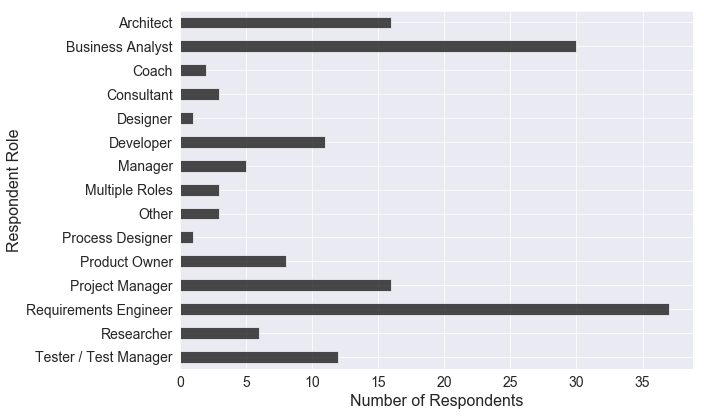

In [4]:
plot_sample(dfdict['truth_metadata'],'v_5_6_integrated', 'Respondent Role')
dfdict['truth_metadata'].to_excel(r"../data/dataexports/participants.xlsx")

# Overall Ratings

In [ ]:
print('Overall number of ratings: ',len(ratings_with_respondent_meta.index))
ratings_with_respondent_meta.head(3)

rating
Unwise           92
Unimportant     548
Worthwhile     1003
Essential       521
Name: lfdn, dtype: int64

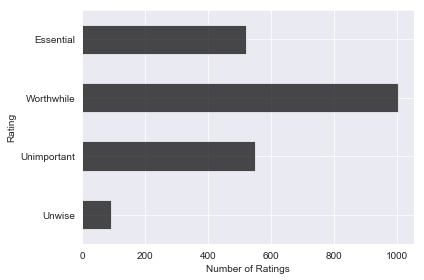

In [3]:
x = ratings_with_respondent_meta.groupby('rating').count(
                            )['lfdn'].sort_index(ascending=False)
x.to_excel(r"../data/dataexports/overall.xlsx")
ratings_with_respondent_meta.to_excel(r"../data/dataexports/ratings.xlsx")
x.plot.barh(stacked=False,color='k', alpha=0.7)
plt.ylabel('Rating')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 9, 6
plt.savefig("../plots/overallPerception.pdf")
plt.savefig("../plots/overallPerception.png")
x

## Number of Ratings per Summary

In [ ]:
ratings_per_summary = ratings_with_respondent_meta.groupby('PaperID').count()['lfdn']
plt.ylabel('Number of Ratings')
plt.xlabel('Paper')
plt.boxplot(ratings_per_summary)
plt.show()
print ("Minimal number of ratings:",ratings_per_summary.min())
print ("Maximum number of ratings:",ratings_per_summary.max())
print ("Median number of ratings:",ratings_per_summary.median())

## Number of Responses and Ratings per Respondent

In [ ]:
ratings_per_respondent = ratings_with_respondent_meta.groupby('lfdn').count()['rating']
plt.ylabel('Number of Ratings')
plt.xlabel('Respondent')
plt.boxplot(ratings_per_respondent)
plt.show()
print ("Minimal number of ratings:",ratings_per_respondent.min())
print ("Maximum number of ratings:",ratings_per_respondent.max())
print ("Median number of ratings:",ratings_per_respondent.median())
print ("Distribribution of number of ratings per respondent:")
ratings_per_respondent.value_counts()

## Distribution of ratings per respondent

In [ ]:
#%load_ext rpy2.ipython

In [ ]:
#%%R -i ratings_with_respondent_meta
# some Jupyter notebook magic is needed touse calcualtion of Fleiss in R within Python
# import ratings_with_respondent_meta from global environment

#install.packages("irr", quiet=TRUE)
#library(irr)

#kappam.fleiss(ratings_with_respondent_meta)


# Ratings Grouped by Respondent Metadata

## Respondent Role

In [ ]:
ratings_with_respondent_meta.head(3)

In [ ]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=True)

In [ ]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=False)

## Respondent Country

In [ ]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Country', absolute=True)

In [ ]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Country', absolute=False)

# Ratings Grouped by Paper Metadata

In [ ]:
ratings_meta = dfdict['paper_metadata'].merge(dfdict['truth_ratings'], on='PaperID')
ratings_meta.head(3)

## Venue

In [ ]:
ratings_meta['Venue'] = ratings_meta['Venue'].replace("FSE","ESEC/FSE")
plot_df(ratings_meta, 'Venue', 'Venue', absolute=False)
plt.savefig("../plots/venues.pdf")

In [ ]:
scores_venue=ratings_meta.groupby(['Venue'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_venue

Aggregate scores by RE specific venues (RE and REFSQ) and rest

In [ ]:
df = ratings_meta.set_index('Venue')
mapping = {'ESEC/FSE': 'Other', 'ESEM': 'Other','ICSE': 'Other','RE': 'RE-Venue','REFSQ': 'RE-Venue'}
score_REvenues=df.groupby([mapping])['rating'].agg([np.size,e_score,ew_score,u_score])
score_REvenues

## Year

In [ ]:
plot_df(ratings_meta, 'Year', 'Year', absolute=False)
plt.savefig("../plots/years.pdf")

In [ ]:
scores_year=ratings_meta.groupby(['Year'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_year

## Author Affiliations and Conference Tracks

In [ ]:
plot_df(ratings_meta, 'AcadVsInd', 'Affiliation', absolute=False)

In [ ]:
plot_df(ratings_meta, 'IndTrack', 'Industry Track', absolute=False)

In [ ]:
plot_df(ratings_meta, ['AcadVsInd','IndTrack'], '(Affiliation, Industry Track)', absolute=False)
plt.savefig("../plots/ind_vs_academic.pdf")

# Ratings Grouped by Paper Tags

In [ ]:
ratings_methodtags = papertags_method.merge(dfdict['truth_ratings'], on='PaperID')
ratings_methodtags.head(1)

In [ ]:
ratings_contenttags = papertags_content.merge(dfdict['truth_ratings'], on='PaperID')
ratings_contenttags.head(1)

## Ratings Grouped by Research Method

In [ ]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=False).loc['how'], 
    "Research Method",
    sort_values=True, rel=False, step=50)

In [ ]:
plot_tag_ratings(
    tag_stats(ratings_methodtags,all_levels[:-1], totals=True, rel=True).loc['how'], 
    "Research Method",
    sort_values=True, rel=True)

## Ratings Grouped by Evaluation Subjects

In [ ]:
plot_tag_ratings(
    tag_stats(ratings_methodtags,all_levels[:-1], totals=True, rel=False).loc['withwhom'], 
    "Subjects",
    sort_values=True, rel=False)

In [ ]:
%run setup.py

plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=True).loc['withwhom'], 
    "Subjects",
    sort_values=True, rel=True)
plt.savefig("../plots/students_vs_professionals.pdf")

## Ratings Grouped by Documentation Style

In [ ]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)
data.head(3)

In [ ]:
reshaped = \
(data.set_index(data.columns.drop('documentation',1).tolist())
   .documentation.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'documentation'})
   .loc[:, data.columns]
)

reshaped.head(5)

In [ ]:
%run setup.py

ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')

plot_df(ratings_with_tags, 'documentation', 'Documentation', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content.pdf")

#Calculate scores
scores_doc=ratings_with_tags.groupby(['documentation'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_doc["category"]="documentation"

ratings_with_tags.groupby('rating').count()

In [ ]:
papercount_doc=ratings_with_tags.groupby(['documentation'])['PaperID'].nunique()

#join both tables
stats_doc=scores_doc.merge(pd.DataFrame(papercount_doc), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_doc

## Ratings based on People aspects

In [ ]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('people',1).tolist())
   .people.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'people'})
   .loc[:, data.columns]
)

reshaped.head(5)

In [ ]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'people', 'People', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_people.pdf")

#Calculate scores
scores_people=ratings_with_tags.groupby(['people'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_people["category"]="people"

ratings_with_tags.groupby('rating').count()

In [ ]:
papercount_people=ratings_with_tags.groupby(['people'])['PaperID'].nunique()

#join both tables
stats_people=scores_people.merge(pd.DataFrame(papercount_people), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_people

## Ratings based on Quality

In [ ]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('quality',1).tolist())
   .quality.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'quality'})
   .loc[:, data.columns]
)

reshaped.head(5)

In [ ]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'quality', 'Quality', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_quality.pdf")

#Calculate scores
scores_quality=ratings_with_tags.groupby(['quality'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_quality["category"]="quality"

In [ ]:
papercount_quality=ratings_with_tags.groupby(['quality'])['PaperID'].nunique()

#join both tables
stats_quality=scores_quality.merge(pd.DataFrame(papercount_quality), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_quality

## Rating based on Phase

In [ ]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('phase',1).tolist())
   .phase.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'phase'})
   .loc[:, data.columns]
)

reshaped.head(5)

In [ ]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'phase', 'Phase', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_phase.pdf")

#Calculate scores
scores_phase=ratings_with_tags.groupby(['phase'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_phase["category"]="phase"

In [ ]:
papercount_phase=ratings_with_tags.groupby(['phase'])['PaperID'].nunique()

#join both tables
stats_phase=scores_phase.merge(pd.DataFrame(papercount_phase), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_phase

## Ratings based on Process

In [ ]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('process',1).tolist())
   .process.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'process'})
   .loc[:, data.columns]
)

reshaped.head(5)

In [ ]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'process', 'Process', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_process.pdf")

#Calculate scores
scores_process=ratings_with_tags.groupby(['process'])['rating'].agg([np.size,e_score,ew_score,u_score])
scores_process["category"]="process"
scores_process

In [ ]:
papercount_process=ratings_with_tags.groupby(['process'])['PaperID'].nunique()
papercount_process

#join both tables
stats_process=scores_process.merge(pd.DataFrame(papercount_process), left_index=True, right_index=True).rename(columns={'PaperID':'nr_Papers'})
stats_process

## Summary of important topics

In [ ]:
scores = stats_doc.append(stats_people).append(stats_quality).append(stats_phase).append(stats_process).sort_values(by=['e_score','ew_score'], ascending=False)
unwise_scores = scores.sort_values(by=['u_score'],ascending=False)
display(scores.head(10),unwise_scores.head(5))